In [3]:
#normal imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

#ML import
from sklearn.linear_model import LogisticRegression

In [10]:
#read training dataset
data_train = pd.read_csv("BankCustomers-Train.csv")
data_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

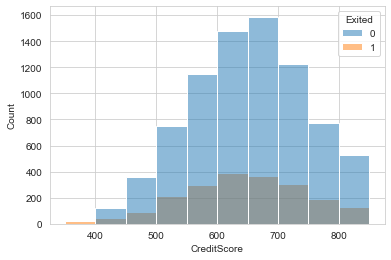

In [14]:
sns.histplot(x='CreditScore', data = data_train, hue='Exited', bins=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

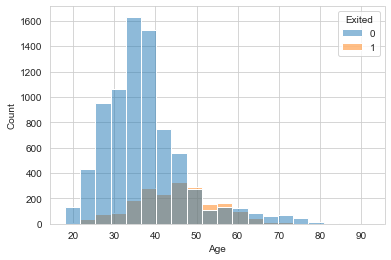

In [19]:
sns.histplot(x='Age', data = data_train, hue='Exited', bins=20)
# Customers above 50 seem more likely to leave

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

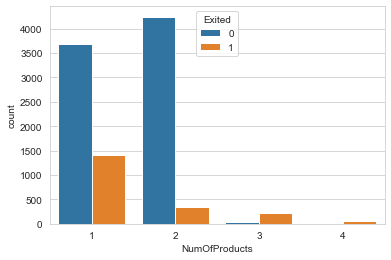

In [22]:
sns.countplot(x='NumOfProducts', data = data_train, hue='Exited')
# Lesser the products Customers use, more likely they will churn

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

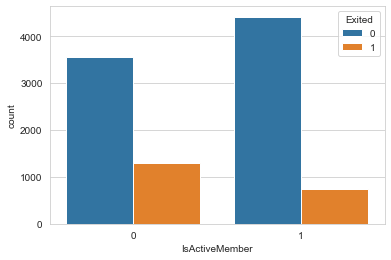

In [23]:
sns.countplot(x='IsActiveMember', data = data_train, hue='Exited')
# Inactive customers are more likely to leave

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

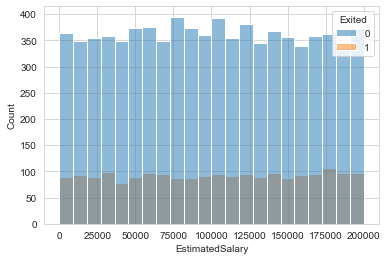

In [24]:
sns.histplot(x='EstimatedSalary', data = data_train, hue='Exited')
# Salary doesn't seem to associated with whether Customer will leave or stay

<AxesSubplot:xlabel='Geography', ylabel='count'>

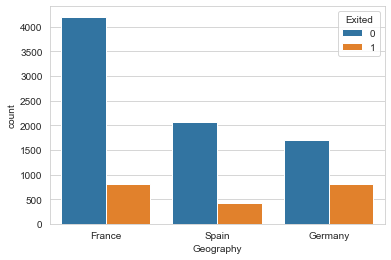

In [26]:
sns.countplot(x='Geography', data = data_train, hue='Exited')

<AxesSubplot:xlabel='Gender', ylabel='count'>

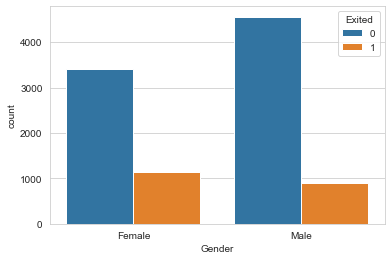

In [27]:
sns.countplot(x='Gender', data = data_train, hue='Exited')
# Female customers are slighly have greater chance to leave

In [25]:
data_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [28]:
# Prepare data for modelling
# Make dummies for Geography and Gender
geography_dummies = pd.get_dummies(data_train['Geography'])
gender_dummies = pd.get_dummies(data_train['Gender'])

In [37]:
dummies = pd.concat([geography_dummies, gender_dummies], axis=1)

In [39]:
# Concat dummies to original data
X = pd.concat([data_train, dummies], axis=1)

In [42]:
# drop unecessary columns & to avoid multicollinearity
X.drop(['Geography', 'Gender', 'Exited', 'Male', 'France','EstimatedSalary'], axis=1, inplace=True)

In [44]:
Y = data_train['Exited']

In [47]:
# drop some more unnecessary columns
X.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [49]:
Y = np.ravel(Y)

In [50]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [51]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Female
0,619,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,0


In [58]:
# data is prepared, create Logistic Model
log_model = LogisticRegression()
log_model.fit(X,Y)

LogisticRegression()

In [59]:
log_model.score(X,Y)

0.7898

In [64]:
data_train.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [65]:
# our null error rate is 79.63%
# the model performs worst than null error rate
# lets check coeff
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,CreditScore,[-0.00519071642892552]
1,Age,[0.04307275117106773]
2,Tenure,[-0.001603018338527012]
3,Balance,[3.5572336855010684e-06]
4,NumOfProducts,[-0.0004516337838885912]
5,HasCrCard,[-0.00018809610025900933]
6,IsActiveMember,[-0.001400948672628815]
7,Germany,[0.0009358198506400044]
8,Spain,[-0.00033162498378317876]
9,Female,[0.0008323712178852663]
